<a href="https://colab.research.google.com/github/HoucemZribi/Diabet/blob/main/Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries for visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

ML Librariries

In [2]:

from sklearn.model_selection import train_test_split, GridSearchCV 

Reading dataset


In [3]:
data = pd.read_csv("./diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Split Data

In [4]:
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

Visualization


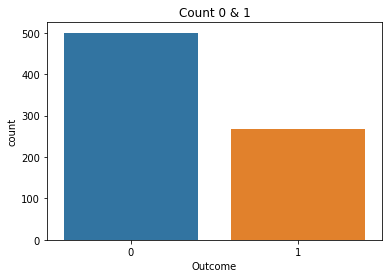

In [5]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

Exploring data


In [6]:
print('data shape : ', data.shape)

data shape :  (768, 9)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Description


In [8]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Analysis of Diabetic Cases

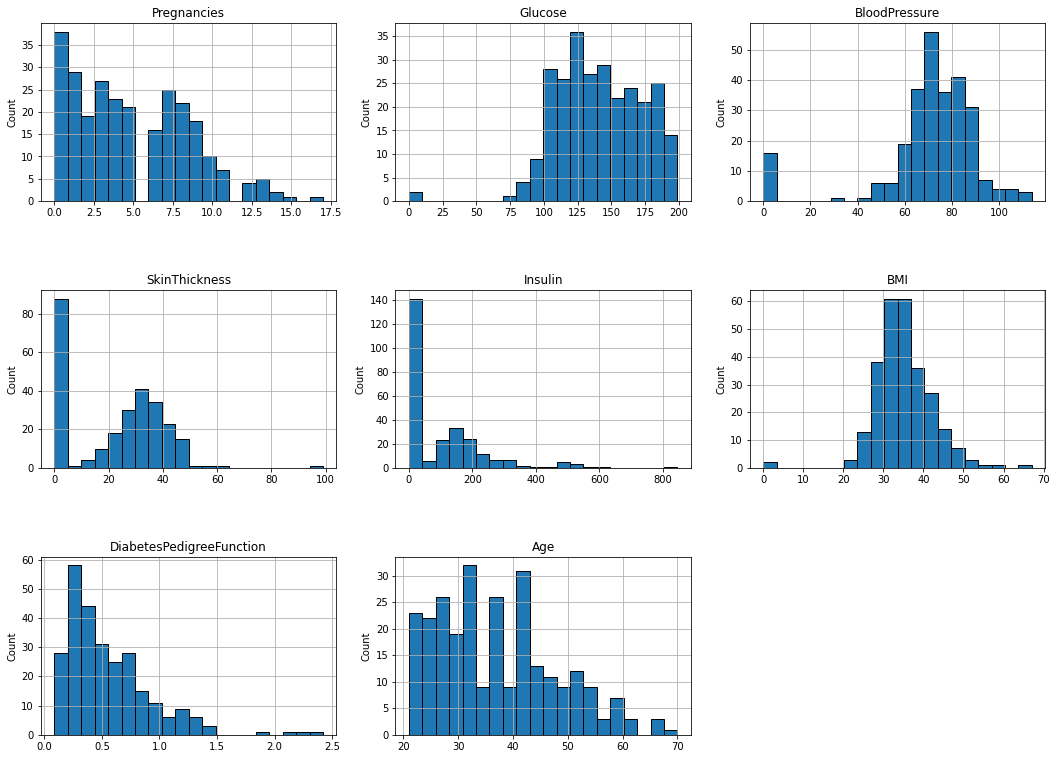

In [9]:
import itertools
from IPython.core.pylabtools import figsize
data_diabetic=data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data_diabetic[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


Analysis of Non-Diabetic Cases

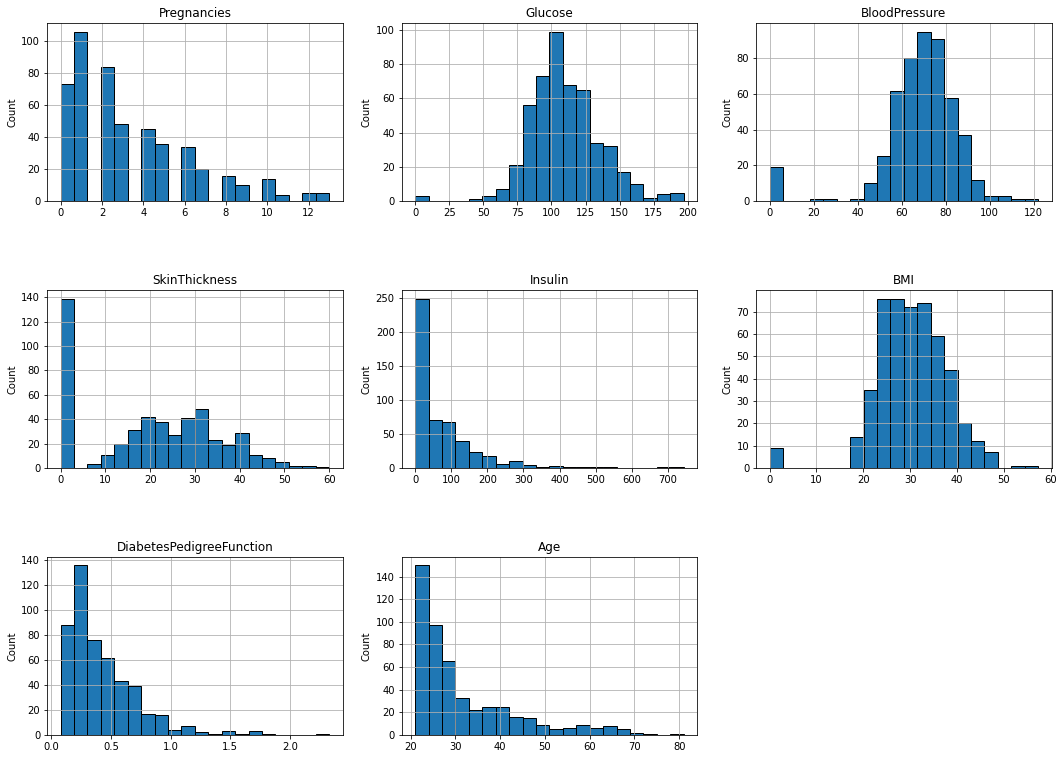

In [10]:
data_non_diabetic = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data_non_diabetic[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Visualization of Features


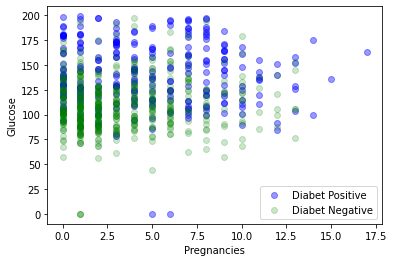

In [11]:
plt.scatter(p.Pregnancies,p.Glucose,color = "blue",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "green",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

Naive Bayes

In [12]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7662337662337663


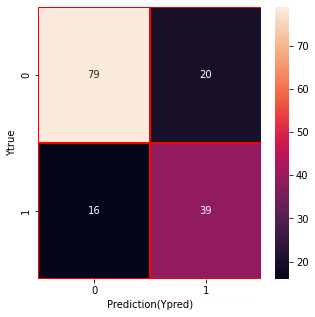

In [13]:

#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)
#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

F1 Score Calculation

In [14]:
from sklearn.metrics import f1_score
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1

0.7679249670568175